## Library imports

In [1]:
import pandas as pd
import numpy as np
import librosa
import IPython.display as ipd
import noisereduce as nr
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm
tqdm.pandas()

from ydata_profiling import ProfileReport


In [2]:
from util import data_address
data_address 

'./data/'

In [3]:
pd.options.plotting.backend = "plotly"

In [4]:
FILE_DIR = data_address+"VOiCES_devkit/"

In [5]:
df_raw = pd.read_pickle(data_address+"df_merged.pkl")
df_raw

,index,chapter,degrees,distractor,filename,gender,mic,query_name,room,segment,source,speaker,transcript,noisy_length,noisy_sr,noisy_time,source_length,source_sr,source_time,category
0,0,32639,160,babb,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,1,Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032639-sg00...,rm4,29,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,4899,and i got on with the lesson very badly i am s...,255040,16000,15.940,255040,16000,15.940,test
1,1,32639,160,babb,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,5,Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032639-sg00...,rm4,29,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,4899,and i got on with the lesson very badly i am s...,255040,16000,15.940,255040,16000,15.940,test
2,2,32658,70,babb,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,5,Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032658-sg00...,rm4,12,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,4899,and ran upstairs to put away the host of littl...,258000,16000,16.125,258000,16000,16.125,test
3,3,32658,70,babb,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,1,Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032658-sg00...,rm4,12,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,4899,and ran upstairs to put away the host of littl...,258000,16000,16.125,258000,16000,16.125,test
4,4,130550,10,babb,distant-16k/speech/test/rm4/babb/sp1447/Lab41-...,F,1,Lab41-SRI-VOiCES-rm4-babb-sp1447-ch130550-sg00...,rm4,26,source-16k/test/sp1447/Lab41-SRI-VOiCES-src-sp...,1447,he was inexhaustibly voluble,58720,16000,3.670,58720,16000,3.670,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,12795,162129,160,none,distant-16k/speech/train/rm4/none/sp2673/Lab41...,M,1,Lab41-SRI-VOiCES-rm4-none-sp2673-ch162129-sg00...,rm4,27,source-16k/train/sp2673/Lab41-SRI-VOiCES-src-s...,2673,and away with it we ought all to say if social...,239840,16000,14.990,239840,16000,14.990,train
19196,12796,75242,170,none,distant-16k/speech/train/rm4/none/sp1212/Lab41...,F,5,Lab41-SRI-VOiCES-rm4-none-sp1212-ch075242-sg00...,rm4,16,source-16k/train/sp1212/Lab41-SRI-VOiCES-src-s...,1212,and zip dropped from the boy's arms not into t...,269040,16000,16.815,269040,16000,16.815,train
19197,12797,75242,170,none,distant-16k/speech/train/rm4/none/sp1212/Lab41...,F,1,Lab41-SRI-VOiCES-rm4-none-sp1212-ch075242-sg00...,rm4,16,source-16k/train/sp1212/Lab41-SRI-VOiCES-src-s...,1212,and zip dropped from the boy's arms not into t...,269040,16000,16.815,269040,16000,16.815,train
19198,12798,14653,160,none,distant-16k/speech/train/rm4/none/sp1212/Lab41...,F,1,Lab41-SRI-VOiCES-rm4-none-sp1212-ch014653-sg00...,rm4,3,source-16k/train/sp1212/Lab41-SRI-VOiCES-src-s...,1212,for for the sake of my reputation i suggested ...,256080,16000,16.005,256080,16000,16.005,train


In [6]:
df_raw.isna().sum()

index            0
chapter          0
degrees          0
distractor       0
filename         0
gender           0
mic              0
query_name       0
room             0
segment          0
source           0
speaker          0
transcript       0
noisy_length     0
noisy_sr         0
noisy_time       0
source_length    0
source_sr        0
source_time      0
category         0
dtype: int64

### Box whisker plot on source_time

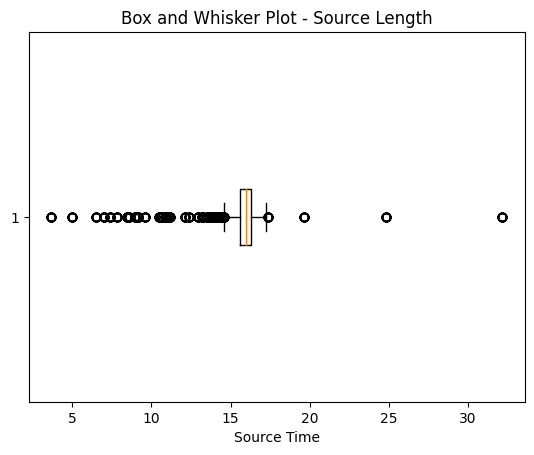

In [7]:
import matplotlib.pyplot as plt

# Create a box and whisker plot
plt.boxplot(df_raw['source_time'], vert=False)

# Set the title and labels
plt.title('Box and Whisker Plot - Source Length')
plt.xlabel('Source Time')

# Show the plot
plt.show()

In [8]:
df_raw.columns

Index(['index', 'chapter', 'degrees', 'distractor', 'filename', 'gender',
       'mic', 'query_name', 'room', 'segment', 'source', 'speaker',
       'transcript', 'noisy_length', 'noisy_sr', 'noisy_time', 'source_length',
       'source_sr', 'source_time', 'category'],
      dtype='object')

In [9]:
# Create a box and whisker plot using Plotly
import plotly.express as px

fig = px.box(df_raw, x='source_time', title='Box and Whisker Plot - Source Length')
# fig.update_layout(xaxis_title='Source Length', yaxis_title='Length')

fig.show()

## loged frequency table

In [10]:
df_raw['noisy_length']

0        255040
1        255040
2        258000
3        258000
4         58720
          ...  
19195    239840
19196    269040
19197    269040
19198    256080
19199    256080
Name: noisy_length, Length: 19200, dtype: int64

In [11]:
import plotly.express as px

fig = px.histogram(df_raw, x="source_time", log_y=True, title="Logged Histogram of Source Time", nbins=100)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGray')))
fig.show()

In [12]:
fig = px.histogram(df_raw, x="source_length", log_y=True, title="Logged Histogram of Source Length", nbins=100)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGray')))
fig.show()

In [13]:
df_raw

,index,chapter,degrees,distractor,filename,gender,mic,query_name,room,segment,source,speaker,transcript,noisy_length,noisy_sr,noisy_time,source_length,source_sr,source_time,category
0,0,32639,160,babb,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,1,Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032639-sg00...,rm4,29,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,4899,and i got on with the lesson very badly i am s...,255040,16000,15.940,255040,16000,15.940,test
1,1,32639,160,babb,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,5,Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032639-sg00...,rm4,29,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,4899,and i got on with the lesson very badly i am s...,255040,16000,15.940,255040,16000,15.940,test
2,2,32658,70,babb,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,5,Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032658-sg00...,rm4,12,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,4899,and ran upstairs to put away the host of littl...,258000,16000,16.125,258000,16000,16.125,test
3,3,32658,70,babb,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,1,Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032658-sg00...,rm4,12,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,4899,and ran upstairs to put away the host of littl...,258000,16000,16.125,258000,16000,16.125,test
4,4,130550,10,babb,distant-16k/speech/test/rm4/babb/sp1447/Lab41-...,F,1,Lab41-SRI-VOiCES-rm4-babb-sp1447-ch130550-sg00...,rm4,26,source-16k/test/sp1447/Lab41-SRI-VOiCES-src-sp...,1447,he was inexhaustibly voluble,58720,16000,3.670,58720,16000,3.670,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,12795,162129,160,none,distant-16k/speech/train/rm4/none/sp2673/Lab41...,M,1,Lab41-SRI-VOiCES-rm4-none-sp2673-ch162129-sg00...,rm4,27,source-16k/train/sp2673/Lab41-SRI-VOiCES-src-s...,2673,and away with it we ought all to say if social...,239840,16000,14.990,239840,16000,14.990,train
19196,12796,75242,170,none,distant-16k/speech/train/rm4/none/sp1212/Lab41...,F,5,Lab41-SRI-VOiCES-rm4-none-sp1212-ch075242-sg00...,rm4,16,source-16k/train/sp1212/Lab41-SRI-VOiCES-src-s...,1212,and zip dropped from the boy's arms not into t...,269040,16000,16.815,269040,16000,16.815,train
19197,12797,75242,170,none,distant-16k/speech/train/rm4/none/sp1212/Lab41...,F,1,Lab41-SRI-VOiCES-rm4-none-sp1212-ch075242-sg00...,rm4,16,source-16k/train/sp1212/Lab41-SRI-VOiCES-src-s...,1212,and zip dropped from the boy's arms not into t...,269040,16000,16.815,269040,16000,16.815,train
19198,12798,14653,160,none,distant-16k/speech/train/rm4/none/sp1212/Lab41...,F,1,Lab41-SRI-VOiCES-rm4-none-sp1212-ch014653-sg00...,rm4,3,source-16k/train/sp1212/Lab41-SRI-VOiCES-src-s...,1212,for for the sake of my reputation i suggested ...,256080,16000,16.005,256080,16000,16.005,train


In [14]:
print(df_raw.groupby('speaker')['speaker'].value_counts())

speaker
32      64
83      64
93      64
112     64
115     64
        ..
8605    64
8635    64
8677    64
8713    64
8855    64
Name: count, Length: 300, dtype: int64


In [15]:
speaker_seg_count = df_raw.groupby('speaker')['segment'].nunique()
speaker_seg_count

speaker
32      2
83      2
93      2
112     2
115     2
       ..
8605    2
8635    2
8677    2
8713    2
8855    2
Name: segment, Length: 300, dtype: int64

In [16]:
speaker_seg_count = df_raw.groupby('speaker')['segment'].nunique().reset_index(name='count_segment')
speaker_seg_count = speaker_seg_count.sort_values(by='count_segment', ascending=False)
speaker_seg_count

,speaker,count_segment
0,32,2
205,5333,2
203,5319,2
202,5189,2
201,5157,2
...,...,...
97,1607,2
299,8855,2
272,7932,1
176,4145,1


In [17]:
df_raw.columns 

Index(['index', 'chapter', 'degrees', 'distractor', 'filename', 'gender',
       'mic', 'query_name', 'room', 'segment', 'source', 'speaker',
       'transcript', 'noisy_length', 'noisy_sr', 'noisy_time', 'source_length',
       'source_sr', 'source_time', 'category'],
      dtype='object')

In [18]:
# filter out the original sound data

df_original = df_raw[
    (df_raw['distractor'] == 'none') &    
    (df_raw['mic'] == 1) &
    (df_raw['room'] == 'rm1') 
]
df_original

,index,chapter,degrees,distractor,filename,gender,mic,query_name,room,segment,source,speaker,transcript,noisy_length,noisy_sr,noisy_time,source_length,source_sr,source_time,category
4401,4401,30106,140,none,distant-16k/speech/test/rm1/none/sp5139/Lab41-...,F,1,Lab41-SRI-VOiCES-rm1-none-sp5139-ch030106-sg00...,rm1,5,source-16k/test/sp5139/Lab41-SRI-VOiCES-src-sp...,5139,mark me well girls a nemesis was on the track ...,267200,16000,16.700000,267200,16000,16.700000,test
4402,4402,61422,60,none,distant-16k/speech/test/rm1/none/sp5139/Lab41-...,F,1,Lab41-SRI-VOiCES-rm1-none-sp5139-ch061422-sg00...,rm1,23,source-16k/test/sp5139/Lab41-SRI-VOiCES-src-sp...,5139,oh come billy we've been all over this before ...,265281,16000,16.580063,265281,16000,16.580063,test
4405,4405,130503,120,none,distant-16k/speech/test/rm1/none/sp1641/Lab41-...,F,1,Lab41-SRI-VOiCES-rm1-none-sp1641-ch130503-sg00...,rm1,6,source-16k/test/sp1641/Lab41-SRI-VOiCES-src-sp...,1641,like a cloud of fire like a cold wind his word...,249760,16000,15.610000,249760,16000,15.610000,test
4406,4406,130505,100,none,distant-16k/speech/test/rm1/none/sp1641/Lab41-...,F,1,Lab41-SRI-VOiCES-rm1-none-sp1641-ch130505-sg00...,rm1,21,source-16k/test/sp1641/Lab41-SRI-VOiCES-src-sp...,1641,lost like the lightning in the sullen clod lov...,247680,16000,15.480000,247680,16000,15.480000,test
4410,4410,181173,130,none,distant-16k/speech/test/rm1/none/sp2182/Lab41-...,F,1,Lab41-SRI-VOiCES-rm1-none-sp2182-ch181173-sg00...,rm1,33,source-16k/test/sp2182/Lab41-SRI-VOiCES-src-sp...,2182,it's a hankercher he poured it all forth as if...,273840,16000,17.115000,273840,16000,17.115000,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9591,3191,131887,100,none,distant-16k/speech/train/rm1/none/sp0492/Lab41...,M,1,Lab41-SRI-VOiCES-rm1-none-sp0492-ch131887-sg00...,rm1,10,source-16k/train/sp0492/Lab41-SRI-VOiCES-src-s...,492,who arrived at suez and to follow up all who s...,245680,16000,15.355000,245680,16000,15.355000,train
9592,3192,230928,160,none,distant-16k/speech/train/rm1/none/sp6099/Lab41...,F,1,Lab41-SRI-VOiCES-rm1-none-sp6099-ch230928-sg00...,rm1,28,source-16k/train/sp6099/Lab41-SRI-VOiCES-src-s...,6099,captain applegarth who was a very old friend o...,251200,16000,15.700000,251200,16000,15.700000,train
9595,3195,69550,170,none,distant-16k/speech/train/rm1/none/sp6099/Lab41...,F,1,Lab41-SRI-VOiCES-rm1-none-sp6099-ch069550-sg00...,rm1,29,source-16k/train/sp6099/Lab41-SRI-VOiCES-src-s...,6099,there was jimmu tenno the first real emperor h...,268720,16000,16.795000,268720,16000,16.795000,train
9596,3196,156755,40,none,distant-16k/speech/train/rm1/none/sp2691/Lab41...,F,1,Lab41-SRI-VOiCES-rm1-none-sp2691-ch156755-sg00...,rm1,30,source-16k/train/sp2691/Lab41-SRI-VOiCES-src-s...,2691,no sooner would i commence operations than the...,266000,16000,16.625000,266000,16000,16.625000,train


In [19]:
# Group by speaker
#  count unique segment
#  sum source_length
speaker_summary = df_original.groupby('speaker').agg(
    segment_count=('segment', 'nunique'),
    source_length_sum=('source_time', 'sum')).reset_index()
# order by the segment count
speaker_summary = speaker_summary.sort_values(by='segment_count', ascending=False)

speaker_summary

,speaker,segment_count,source_length_sum
0,32,2,31.880
205,5333,2,31.880
203,5319,2,32.155
202,5189,2,31.870
201,5157,2,32.310
...,...,...,...
97,1607,2,31.925
299,8855,2,29.040
272,7932,1,33.085
176,4145,1,32.835


In [20]:
speaker_summary['source_length_sum'].hist(bins=30)

In [21]:
# Create a box and whisker plot using Plotly
import plotly.express as px

fig = px.box(speaker_summary, x='source_length_sum', title='Box and Whisker Plot - Source Length')
# fig.update_layout(xaxis_title='Source Length', yaxis_title='Length')

fig.show()

In [22]:
import plotly.express as px

# Creating a horizontal box and whisker plot with annotations
fig = px.box(df_raw, x="source_time", orientation='h', title="Horizontal Box and Whisker Plot of Source Time with Annotations")
fig.update_traces(marker=dict(color='rgb(31, 119, 180)', size=12),
                  line=dict(color='rgb(31, 119, 180)'))
fig.update_layout(showlegend=False)

# Adding annotations for min, max, lower fence, upper fence, q1, q3, and median
annotations = []
for value in ['min', 'max', 'lower fence', 'upper fence', 'q1', 'q3', 'median']:
    annotations.append(dict(xref='x', yref='paper',
                            x=df_raw['source_time'].quantile(0.05) if value == 'lower fence' else
                            df_raw['source_time'].quantile(0.95) if value == 'upper fence' else
                            df_raw['source_time'].min() if value == 'min' else
                            df_raw['source_time'].max() if value == 'max' else
                            df_raw['source_time'].quantile(0.25) if value == 'q1' else
                            df_raw['source_time'].quantile(0.75) if value == 'q3' else
                            df_raw['source_time'].median(),
                            y=1.05 if value == 'max' else 0.95 if value == 'upper fence' else 0.05 if value == 'lower fence' else 0,
                            xanchor='left' if value == 'min' else 'right' if value == 'max' else 'center',
                            text=value,
                            font=dict(family='Arial', size=12, color='black'),
                            showarrow=False)
                      )

fig.update_layout(annotations=annotations)
fig.show()


## Compare distractors

In [23]:
df_distract = df_raw[['source','filename','gender','speaker']]
df_distract

,source,filename,gender,speaker
0,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,4899
1,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,4899
2,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,4899
3,source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp...,distant-16k/speech/test/rm4/babb/sp4899/Lab41-...,F,4899
4,source-16k/test/sp1447/Lab41-SRI-VOiCES-src-sp...,distant-16k/speech/test/rm4/babb/sp1447/Lab41-...,F,1447
...,...,...,...,...
19195,source-16k/train/sp2673/Lab41-SRI-VOiCES-src-s...,distant-16k/speech/train/rm4/none/sp2673/Lab41...,M,2673
19196,source-16k/train/sp1212/Lab41-SRI-VOiCES-src-s...,distant-16k/speech/train/rm4/none/sp1212/Lab41...,F,1212
19197,source-16k/train/sp1212/Lab41-SRI-VOiCES-src-s...,distant-16k/speech/train/rm4/none/sp1212/Lab41...,F,1212
19198,source-16k/train/sp1212/Lab41-SRI-VOiCES-src-s...,distant-16k/speech/train/rm4/none/sp1212/Lab41...,F,1212


In [24]:
df_distract.loc[0,'filename']

'distant-16k/speech/test/rm4/babb/sp4899/Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032639-sg0029-mc01-stu-clo-dg160.wav'

In [25]:
signal, sr = librosa.load(FILE_DIR+df_distract.loc[0,'filename'])
# ipd.Audio(signal, rate=sr)

In [26]:
df_distract.loc[1,'filename']

'distant-16k/speech/test/rm4/babb/sp4899/Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032639-sg0029-mc05-stu-far-dg160.wav'

In [27]:
signal, sr = librosa.load(FILE_DIR+df_distract.loc[1,'filename'])
# ipd.Audio(signal, rate=sr)

## Cosine Similarity

### Raw and distracted data

In [28]:
import matplotlib.pyplot as plt


In [29]:
# speaker = 4899
# seg = 29
filename_raw = "source-16k/test/sp4899/Lab41-SRI-VOiCES-src-sp4899-ch032639-sg0029.wav"

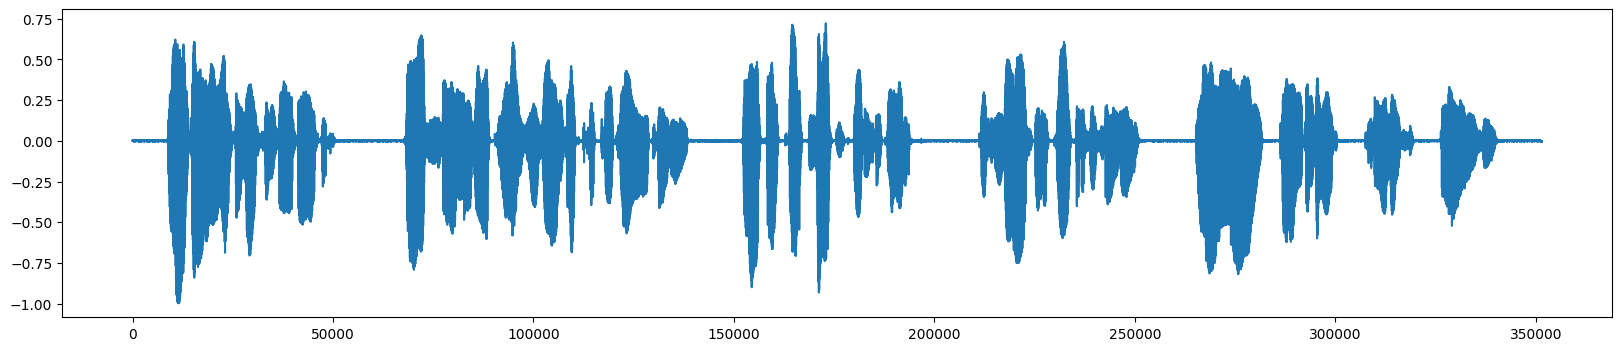

In [30]:
# The original, clear sound
# mic = 1
# room = rm1
# distractor = none
signal_original, sr = librosa.load(FILE_DIR+filename_raw)
plt.figure(figsize=(20, 4))
plt.plot(signal_original)

# ipd.Audio(signal_original, rate=sr)

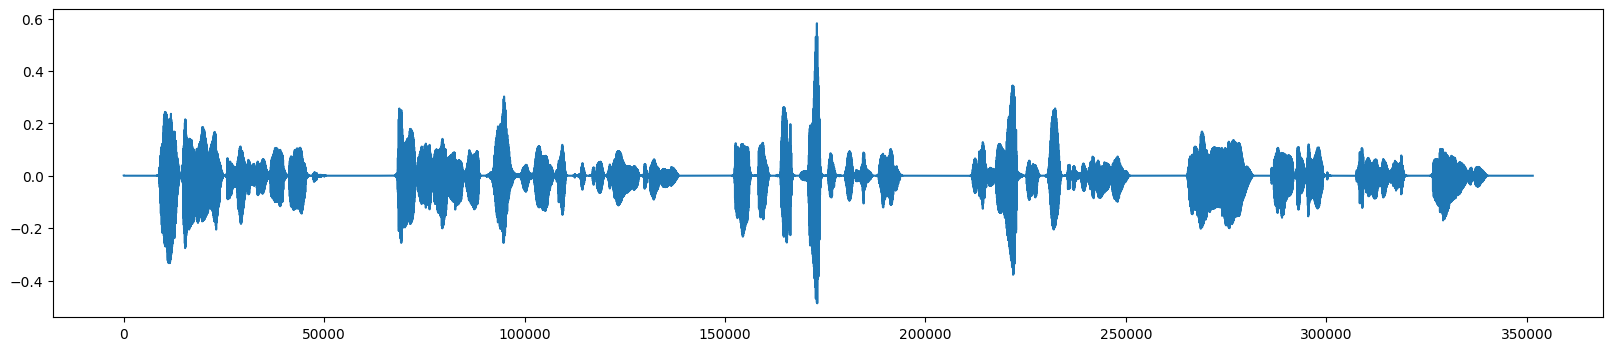

In [31]:
# Denoised original sound
signal_original_cleaned = nr.reduce_noise(signal_original, sr=sr)
plt.figure(figsize=(20, 4))
plt.plot(signal_original_cleaned)
# ipd.Audio(signal_original_cleaned, rate=sr)

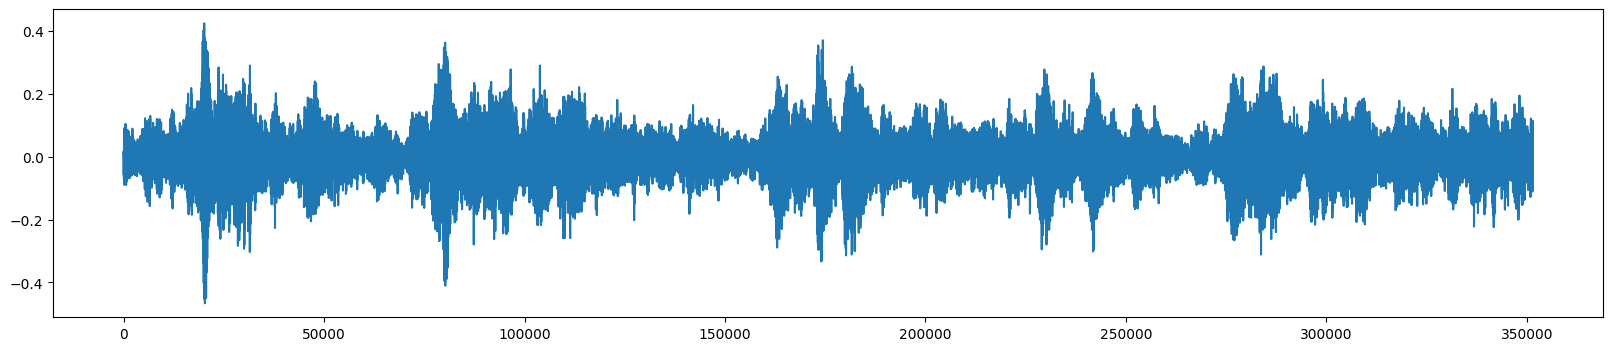

In [32]:
# distraction of noisy room
filename_distracted_bbab = 'distant-16k/speech/test/rm4/babb/sp4899/Lab41-SRI-VOiCES-rm4-babb-sp4899-ch032639-sg0029-mc05-stu-far-dg160.wav'
# mic = 5
# room = rm4
# distractor = bbab
signal_bbab, sr = librosa.load(FILE_DIR+filename_distracted_bbab)
plt.figure(figsize=(20, 4))
plt.plot(signal_bbab)
# ipd.Audio(signal_bbab, rate=sr)


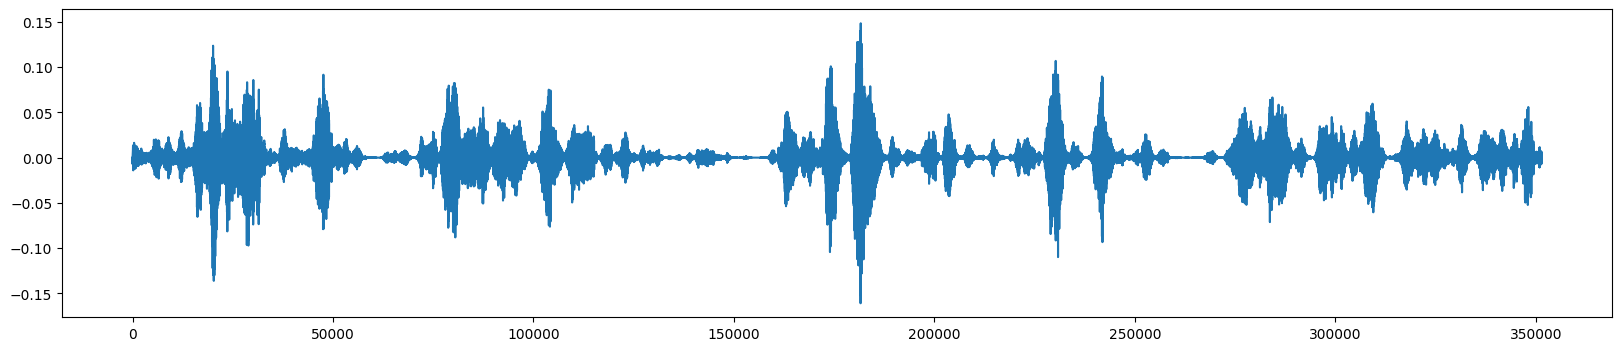

In [33]:
# denoised bbab
signal_bbab_cleaned = nr.reduce_noise(signal_bbab, sr=sr)
plt.figure(figsize=(20, 4))
plt.plot(signal_bbab_cleaned)
# ipd.Audio(signal_bbab_cleaned, rate=sr)

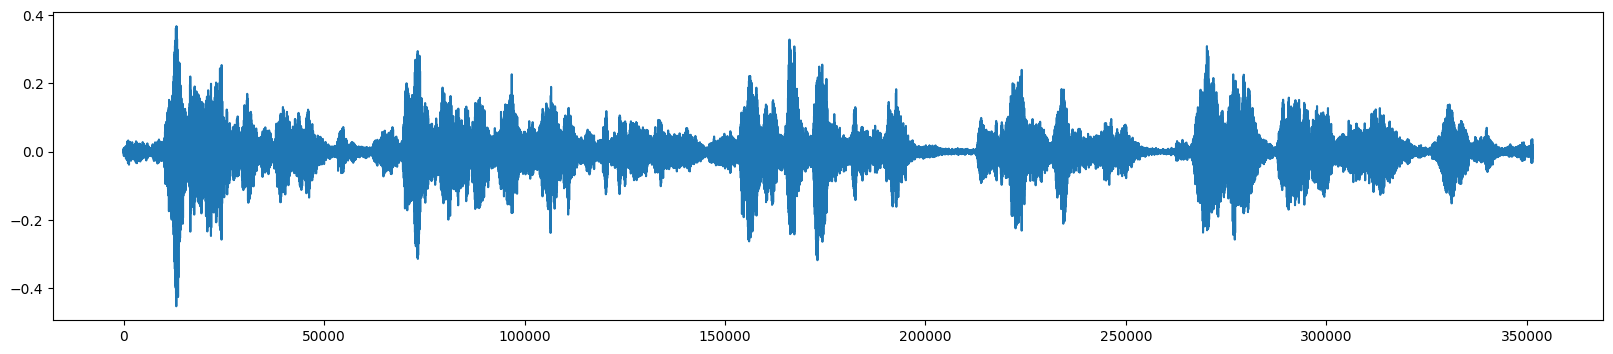

In [34]:
# very distraction of a radio
filename_distracted_tele = 'distant-16k/speech/test/rm4/tele/sp4899/Lab41-SRI-VOiCES-rm4-tele-sp4899-ch032639-sg0029-mc05-stu-far-dg160.wav'
# mic = 5
# room = rm4
# distractor = tele
signal_tele, sr = librosa.load(FILE_DIR+filename_distracted_tele)
plt.figure(figsize=(20, 4))
plt.plot(signal_tele)
# ipd.Audio(signal_tele, rate=sr)


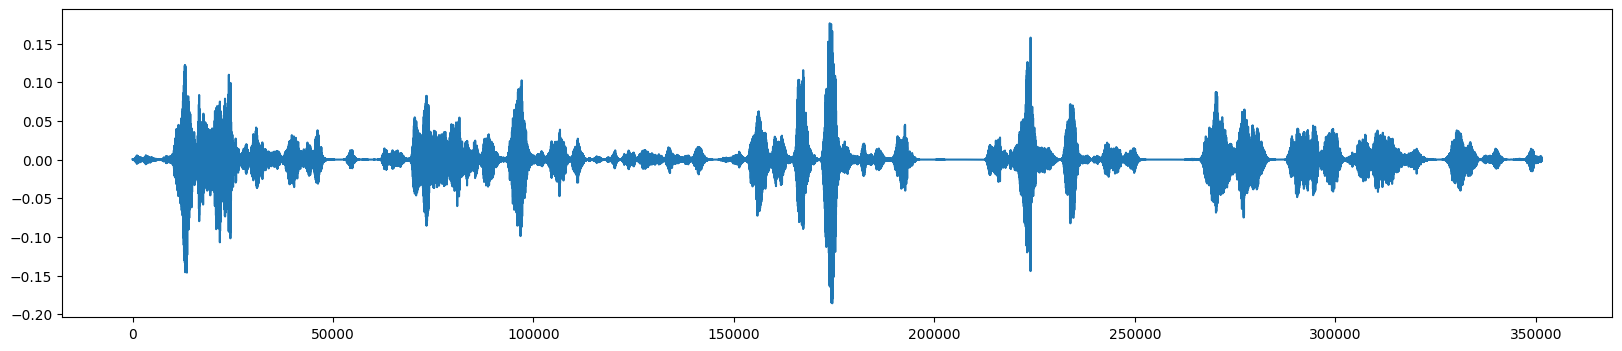

In [35]:
# denoised tele
signal_tele_cleaned = nr.reduce_noise(signal_tele, sr=sr)
plt.figure(figsize=(20, 4))
plt.plot(signal_tele_cleaned)
# ipd.Audio(signal_tele_cleaned, rate=sr)

### Noise data

In [36]:
len(signal_original)

351477

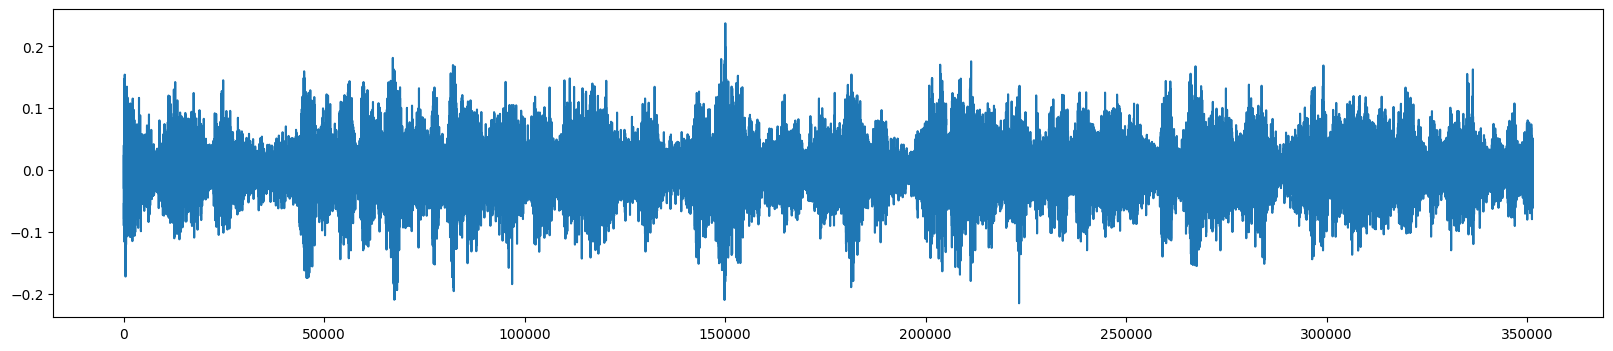

In [37]:
# bbab
filename_bbab = 'distant-16k/distractors/rm4/babb/Lab41-SRI-VOiCES-rm4-babb-mc05-stu-far.wav'
# mic = 5
# room = rm4
# distractor = bbab
signal_dis_bbab, sr = librosa.load(FILE_DIR+filename_bbab)
signal_dis_bbab = signal_dis_bbab[:len(signal_original)]
plt.figure(figsize=(20, 4))
plt.plot(signal_dis_bbab)
# ipd.Audio(signal_dis_bbab, rate=sr)


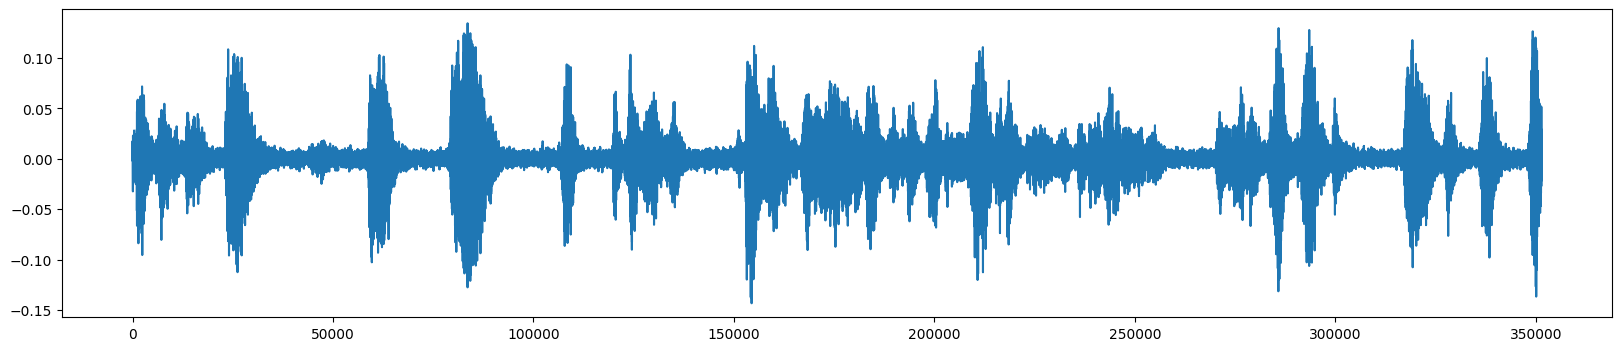

In [38]:
# tele
filename_tele = 'distant-16k/distractors/rm4/tele/Lab41-SRI-VOiCES-rm4-tele-mc05-stu-far.wav'
# data\VOiCES_devkit\distant-16k\distractors\rm4\tele\Lab41-SRI-VOiCES-rm4-tele-mc05-stu-far.wav
# mic = 5
# room = rm4
# distractor = tele
signal_dis_tele, sr = librosa.load(FILE_DIR+filename_tele)
signal_dis_tele = signal_dis_tele[:len(signal_original)]
plt.figure(figsize=(20, 4))
plt.plot(signal_dis_tele)
# ipd.Audio(signal_dis_tele, rate=sr)


### Calculate cosine similarity

In [39]:
def cal_cos_sim(signal1,signal2):
    # Calculate the cosine similarity
    similarity = cosine_similarity([signal1], [signal2])

    # change 2D arry to numerical value
    cosine_similarity_value = similarity[0][0]
    return cosine_similarity_value

In [40]:
cal_cos_sim(signal_original,signal_original_cleaned)

0.926154

In [41]:
cal_cos_sim(signal_original,signal_original)

0.9999876

In [42]:
cal_cos_sim(signal_original,signal_bbab)

0.0038821853

In [43]:
cal_cos_sim(signal_dis_bbab,signal_bbab)

-0.00041729852

In [44]:
cal_cos_sim(signal_bbab_cleaned,signal_original)

0.0060213613

In [45]:
cal_cos_sim(signal_tele,signal_original)

0.02640169

In [46]:
cal_cos_sim(signal_tele_cleaned,signal_original)

0.0049754325